In [17]:
import pandas as pd

# Load the dataset
train_file = "train_data.csv"
test_file = "validation_data.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [18]:
print(train_data)

                                       [('DF', 'PROPN')]
0      [('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM...
1      [('The', 'DET'), ('industry', 'NOUN'), ('has',...
2      [('Love', 'VERB'), ('this', 'DET'), ('place', ...
3      [('This', 'DET'), ('problem', 'NOUN'), ('of', ...
4      [('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X...
...                                                  ...
52494  [('Superstition', 'NOUN'), ('has', 'VERB'), ('...
52495  [('You', 'PRON'), ('now', 'ADV'), ('should', '...
52496  [('But', 'CONJ'), ('in', 'ADP'), ('the', 'DET'...
52497  [('Specifically', 'ADV'), (',', 'PUNCT'), ('Je...
52498  [('B', 'ADJ'), ('&', 'CCONJ'), ('w', 'ADJ'), (...

[52499 rows x 1 columns]


In [19]:
from collections import defaultdict
import ast

# Dictionary of tag vs count
tag_dict = defaultdict(int)

# Dictionary of {word, tag} vs count
word_tag_dict = defaultdict(int)

# Dictionary of {tag i, tag i + 1} vs count
two_tag_dict = defaultdict(int)

# Total sentence count
sentence_count = 0

# Dictionary of first word vs count
first_word_dict = defaultdict(int)

for index, row in train_data.iterrows():
    sentence = ast.literal_eval(row.iloc[0])
    sentence_count = sentence_count + 1

    first_word_dict[(sentence[0][0], sentence[0][1])] = first_word_dict[(sentence[0][0], sentence[0][1])] + 1

    prev_tag = None
    for word, tag in sentence:
        tag_dict[tag] = tag_dict[tag] + 1
        word_tag_dict[(word, tag)] = word_tag_dict[(word, tag)] + 1

        if prev_tag is not None:
            two_tag_dict[(prev_tag, tag)] = two_tag_dict[(prev_tag, tag)] + 1
        prev_tag = tag

In [20]:
print(tag_dict)

defaultdict(<class 'int'>, {'NUM': 17148, 'NOUN': 240200, 'DET': 115786, 'VERB': 151833, 'ADJ': 76692, '.': 94933, 'PUNCT': 23826, 'ADP': 125188, 'CONJ': 27234, 'PROPN': 19556, 'X': 13180, 'PRON': 48875, 'ADV': 49059, 'AUX': 12771, 'INTJ': 755, 'CCONJ': 6535, 'PRT': 18688, 'PART': 7586, 'SCONJ': 3720, '_': 2668, 'SYM': 739})


In [21]:
for key, value in word_tag_dict.items():
    print(f"Key = {key}, Value = {value}")

Key = ('03/01/2001', 'NUM'), Value = 1
Key = ('01:35', 'NUM'), Value = 1
Key = ('PM', 'NOUN'), Value = 112
Key = ('The', 'DET'), Value = 6473
Key = ('industry', 'NOUN'), Value = 172
Key = ('has', 'VERB'), Value = 2259
Key = ('said', 'VERB'), Value = 1528
Key = ('1960', 'NUM'), Value = 136
Key = ('was', 'VERB'), Value = 6160
Key = ('a', 'DET'), Value = 19576
Key = ('poor', 'ADJ'), Value = 86
Key = ('year', 'NOUN'), Value = 784
Key = ('.', '.'), Value = 31619
Key = ('Love', 'VERB'), Value = 5
Key = ('this', 'DET'), Value = 3564
Key = ('place', 'NOUN'), Value = 537
Key = ('!!', 'PUNCT'), Value = 77
Key = ('This', 'DET'), Value = 989
Key = ('problem', 'NOUN'), Value = 333
Key = ('of', 'ADP'), Value = 30980
Key = ('the', 'DET'), Value = 54535
Key = ('optimum', 'ADJ'), Value = 12
Key = ('balance', 'NOUN'), Value = 81
Key = ('in', 'ADP'), Value = 17240
Key = ('relative', 'ADJ'), Value = 38
Key = ('numbers', 'NOUN'), Value = 123
Key = ('generalists', 'NOUN'), Value = 2
Key = ('and', 'CONJ'), V

In [22]:
for key, value in two_tag_dict.items():
    print(f"Key = {key}, value = {value}")

Key = ('NUM', 'NUM'), value = 913
Key = ('NUM', 'NOUN'), value = 6172
Key = ('DET', 'NOUN'), value = 70462
Key = ('NOUN', 'VERB'), value = 33836
Key = ('VERB', 'VERB'), value = 24543
Key = ('VERB', 'NUM'), value = 1637
Key = ('NUM', 'VERB'), value = 605
Key = ('VERB', 'DET'), value = 25119
Key = ('DET', 'ADJ'), value = 28002
Key = ('ADJ', 'NOUN'), value = 48901
Key = ('NOUN', '.'), value = 53459
Key = ('NOUN', 'PUNCT'), value = 9994
Key = ('NOUN', 'ADP'), value = 58578
Key = ('ADP', 'DET'), value = 54214
Key = ('ADP', 'NOUN'), value = 30718
Key = ('NOUN', 'CONJ'), value = 12047
Key = ('CONJ', 'NOUN'), value = 6981
Key = ('VERB', 'ADP'), value = 26111
Key = ('NOUN', 'NOUN'), value = 36162
Key = ('PROPN', 'VERB'), value = 1510
Key = ('VERB', 'X'), value = 2230
Key = ('X', 'DET'), value = 963
Key = ('DET', 'PROPN'), value = 1962
Key = ('PROPN', 'NOUN'), value = 1461
Key = ('VERB', 'NOUN'), value = 14833
Key = ('NOUN', 'PROPN'), value = 379
Key = ('PROPN', 'X'), value = 1546
Key = ('PRON',

In [23]:
for key, value in first_word_dict.items():
    print(f"Key = {key}, value = {value}")

Key = ('03/01/2001', 'NUM'), value = 1
Key = ('The', 'DET'), value = 5810
Key = ('Love', 'VERB'), value = 3
Key = ('This', 'DET'), value = 934
Key = ('Esso', 'PROPN'), value = 2
Key = ('He', 'PRON'), value = 1680
Key = ('Glendora', 'NOUN'), value = 4
Key = ('Each', 'DET'), value = 94
Key = ('In', 'ADP'), value = 1576
Key = ('Can', 'AUX'), value = 48
Key = ('``', '.'), value = 1657
Key = ('After', 'ADP'), value = 183
Key = ('Be', 'VERB'), value = 18
Key = ('Salary', 'NOUN'), value = 2
Key = ('There', 'PRT'), value = 501
Key = ('But', 'CCONJ'), value = 110
Key = ('What', 'PRON'), value = 101
Key = ('Yes', 'INTJ'), value = 36
Key = ('Whenever', 'ADV'), value = 10
Key = ('Daniel', 'PROPN'), value = 2
Key = ('Adds', 'VERB'), value = 2
Key = ('If', 'SCONJ'), value = 248
Key = ('And', 'CONJ'), value = 480
Key = ('Dave', 'NOUN'), value = 4
Key = ('Thanks', 'NOUN'), value = 188
Key = ('Danny', 'PROPN'), value = 2
Key = ('Six', 'NUM'), value = 17
Key = ('Macrophages', 'NOUN'), value = 1
Key = ("

In [24]:
# Emission probability
emission_probability = defaultdict(lambda: defaultdict(int))

# Transition probability
transition_probability = defaultdict(lambda: defaultdict(int))

# Initial probability
initial_probability = defaultdict(int)

for key, value in word_tag_dict.items():
    emission_probability[key[0]][key[1]] = word_tag_dict[key]/tag_dict[key[1]]

for key, value in two_tag_dict.items():
    transition_probability[key[0]][key[1]] = two_tag_dict[key]/tag_dict[key[0]]

for key, value in first_word_dict.items():
    initial_probability[key[1]] = initial_probability[key[1]] + value/sentence_count

# transition_probability["START"] = initial_probability

In [25]:
for word in emission_probability.keys():
    for tag, prob in emission_probability[word].items():
        print(f"Word = {word}, Tag = {tag}, Probability = {prob}")

Word = 03/01/2001, Tag = NUM, Probability = 5.831583858175881e-05
Word = 01:35, Tag = NUM, Probability = 5.831583858175881e-05
Word = PM, Tag = NOUN, Probability = 0.00046627810158201497
Word = The, Tag = DET, Probability = 0.05590485896395073
Word = The, Tag = PRON, Probability = 2.0460358056265986e-05
Word = The, Tag = PROPN, Probability = 0.0001534056044180814
Word = industry, Tag = NOUN, Probability = 0.0007160699417152373
Word = has, Tag = VERB, Probability = 0.014878188536088993
Word = has, Tag = AUX, Probability = 0.02646621251272414
Word = has, Tag = X, Probability = 7.587253414264036e-05
Word = said, Tag = VERB, Probability = 0.010063688394486047
Word = 1960, Tag = NUM, Probability = 0.007930954047119198
Word = was, Tag = VERB, Probability = 0.04057089038614794
Word = was, Tag = AUX, Probability = 0.09083078850520711
Word = a, Tag = DET, Probability = 0.16907052666125438
Word = a, Tag = ADJ, Probability = 2.607833933135138e-05
Word = a, Tag = ADP, Probability = 5.5915902482666

In [26]:
for tag_1 in transition_probability.keys():
    for tag_2, prob in transition_probability[tag_1].items():
        print(f"Tag 1 = {tag_1}, Tag 2 = {tag_2}, Probability = {prob}")

Tag 1 = NUM, Tag 2 = NUM, Probability = 0.05324236062514579
Tag 1 = NUM, Tag 2 = NOUN, Probability = 0.3599253557266153
Tag 1 = NUM, Tag 2 = VERB, Probability = 0.03528108234196408
Tag 1 = NUM, Tag 2 = ADJ, Probability = 0.04980172614882202
Tag 1 = NUM, Tag 2 = ., Probability = 0.18410310240261255
Tag 1 = NUM, Tag 2 = PROPN, Probability = 0.011080009330534173
Tag 1 = NUM, Tag 2 = AUX, Probability = 0.002507581059015629
Tag 1 = NUM, Tag 2 = X, Probability = 0.03790529507814323
Tag 1 = NUM, Tag 2 = ADP, Probability = 0.10776766969909027
Tag 1 = NUM, Tag 2 = DET, Probability = 0.010496850944716585
Tag 1 = NUM, Tag 2 = PUNCT, Probability = 0.06513879169582458
Tag 1 = NUM, Tag 2 = SYM, Probability = 0.008397480755773267
Tag 1 = NUM, Tag 2 = CONJ, Probability = 0.02630044320037322
Tag 1 = NUM, Tag 2 = PRON, Probability = 0.0074644273384651275
Tag 1 = NUM, Tag 2 = ADV, Probability = 0.014870538838348496
Tag 1 = NUM, Tag 2 = PRT, Probability = 0.0037905295078143222
Tag 1 = NUM, Tag 2 = PART, P

In [27]:
for key, value in initial_probability.items():
    print(f"Tag = {key}, Probability = {value}")

Tag = NUM, Probability = 0.022686146402788834
Tag = DET, Probability = 0.19897521857559203
Tag = VERB, Probability = 0.04920093716070669
Tag = PROPN, Probability = 0.04114364083125334
Tag = PRON, Probability = 0.161374502371474
Tag = NOUN, Probability = 0.123983313967879
Tag = ADP, Probability = 0.11245928493876069
Tag = AUX, Probability = 0.00653345778014819
Tag = ., Probability = 0.04421036591173165
Tag = PRT, Probability = 0.023657593477971067
Tag = CCONJ, Probability = 0.005409626850035238
Tag = INTJ, Probability = 0.008533495876111944
Tag = ADV, Probability = 0.08525876683365347
Tag = SCONJ, Probability = 0.008666831749176184
Tag = CONJ, Probability = 0.03701022876626221
Tag = _, Probability = 0.010552581953942031
Tag = PUNCT, Probability = 0.009695422769957544
Tag = X, Probability = 0.005962018324158553
Tag = ADJ, Probability = 0.0416388883597776
Tag = SYM, Probability = 0.001714318367968913
Tag = PART, Probability = 0.0013333587306424886


In [28]:
# # Krish Attempt
# import numpy as np

# def viterbi_algorithm(
#     sentence, unique_tags, initial_prob, transition_prob, emission_prob
# )->list:
#     n = len(sentence)
#     m = len(unique_tags)
#     tags_list = list(unique_tags)

#     # Viterbi matrix
#     viterbi = np.zeros((m, n))

#     # Backpointer matrix
#     backpointer = np.zeros((m, n), dtype=int)

#     # Initialize first column
#     for i, tag in enumerate(tags_list):
#         viterbi[i, 0] = initial_prob.get(tag, 1e-6) * emission_prob.get(
#             (tag, sentence[0]), 1e-6
#         )

#     # Recursion step
#     for t in range(1, n):
#         for j, curr_tag in enumerate(tags_list):
#             max_prob, best_prev_tag = max(
#                 [
#                     (
#                         viterbi[i, t - 1]
#                         * transition_prob.get((prev_tag, curr_tag), 1e-6)
#                         * emission_prob.get((curr_tag, sentence[t]), 1e-6),
#                         i,
#                     )
#                     for i, prev_tag in enumerate(tags_list)
#                 ]
#             )
#             viterbi[j, t] = max_prob
#             backpointer[j, t] = best_prev_tag

#     # Backtracking to retrieve the best sequence
#     best_tags = []
#     best_last_tag = np.argmax(viterbi[:, n - 1])
#     best_tags.append(tags_list[best_last_tag])

#     for t in range(n - 1, 0, -1):
#         best_last_tag = backpointer[best_last_tag, t]
#         best_tags.insert(0, tags_list[best_last_tag])

#     return best_tags

In [29]:
# Valmik attempt - Optimized for efficiency using list of dictionaries

def viterbi_algorithm(sentence, unique_tags, initial_prob, transition_prob, emission_prob) -> list:
    n = len(sentence)  # Number of words
    tags_list = list(unique_tags)  # Convert set to list for indexing
    
    # Using list of dictionaries for better performance
    viterbi = [{} for _ in range(n)]  # List of dictionaries for Viterbi matrix
    backpointer = [{} for _ in range(n)]  # List of dictionaries for backpointer matrix

    # Initialize first column
    for tag in tags_list:
        viterbi[0][tag] = initial_prob.get(tag, 1e-7) * emission_prob.get((tag, sentence[0]), 1e-7)
        backpointer[0][tag] = None

    # Recursion step using list of dictionaries
    for t in range(1, n):
        for curr_tag in tags_list:
            max_prob, best_prev_tag = max(
                (
                    viterbi[t - 1].get(prev_tag, 1e-7) * transition_prob.get((prev_tag, curr_tag), 1e-7) * emission_prob.get((curr_tag, sentence[t]), 1e-7),
                    prev_tag
                )
                for prev_tag in tags_list
            )
            viterbi[t][curr_tag] = max_prob
            backpointer[t][curr_tag] = best_prev_tag

    # Backtracking to retrieve the best sequence
    best_tags = []
    best_last_tag = max(tags_list, key=lambda tag: viterbi[-1].get(tag, 0))
    best_tags.append(best_last_tag)

    for t in range(n - 1, 0, -1):
        best_last_tag = backpointer[t][best_last_tag]
        best_tags.insert(0, best_last_tag)

    return best_tags

In [30]:
import itertools

# Optimized POS Tag Prediction for Validation Dataset
predicted_tags = []
actual_tags = []
validation_sentences = []

# Preprocess validation sentences
validation_sentences = [ast.literal_eval(row.iloc[0]) for _, row in test_data.iterrows()]

# Convert emission_probability to match expected format once to avoid redundant computation
emission_prob = {
    (tag, word): prob
    for word, tags in emission_probability.items()
    for tag, prob in tags.items()
}

def process_sentence(sentence):
    words = [word for word, _ in sentence]
    actual_tags.extend([tag for _, tag in sentence])  # Storing actual tags
    return viterbi_algorithm(
        words,
        tag_dict.keys(),
        initial_probability,
        transition_probability,
        emission_prob,
    )

# Process all sentences efficiently using list comprehension
predicted_tags_nested = [process_sentence(sentence) for sentence in validation_sentences]

# Flatten predicted tags list
predicted_tags = list(itertools.chain.from_iterable(predicted_tags_nested))

# Ensure lengths match
assert len(actual_tags) == len(predicted_tags), "Mismatch between actual and predicted tag lengths!"

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_tags, predicted_tags)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 72.28%


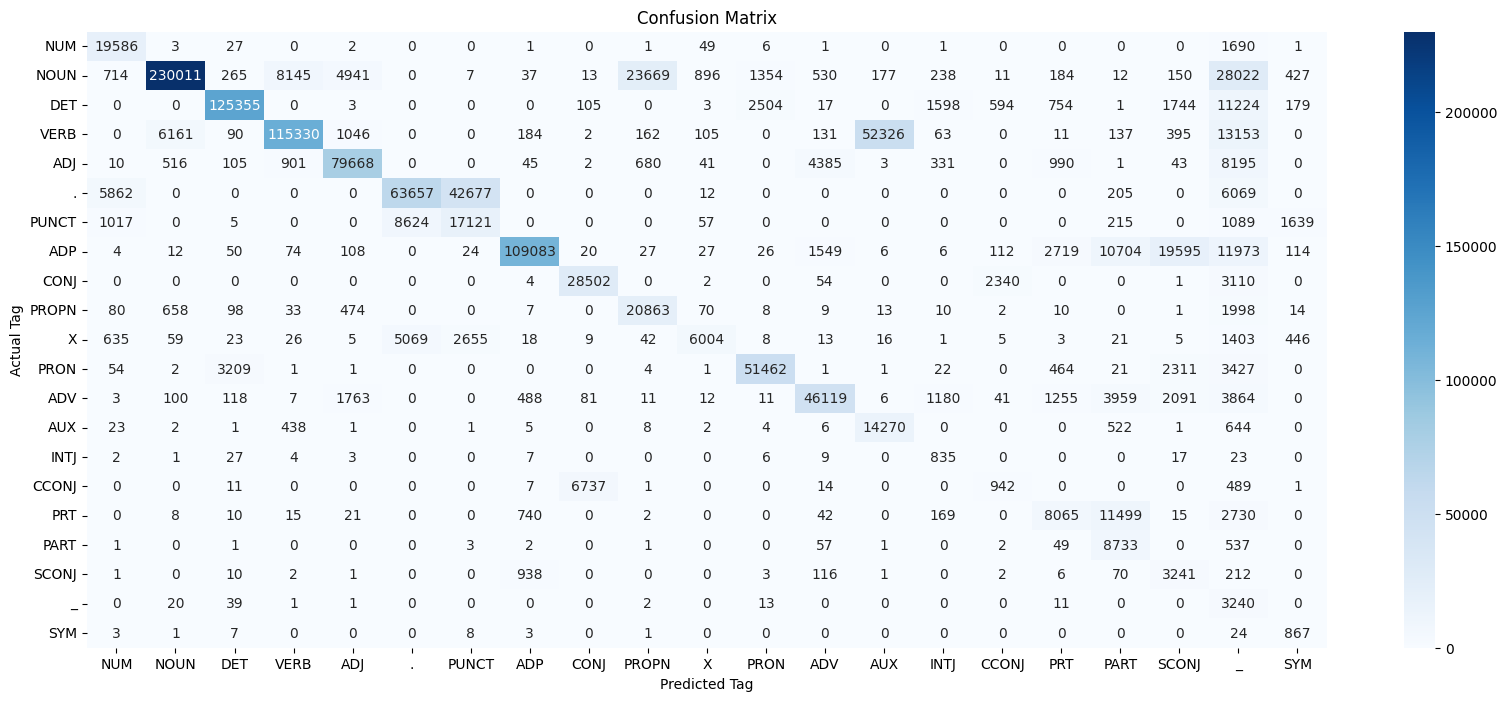

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique tags from tag_dict
unique_tags = list(tag_dict.keys())

cm = confusion_matrix(actual_tags, predicted_tags, labels=list(unique_tags))
plt.figure(figsize=(20, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=unique_tags,
    yticklabels=unique_tags,
    cmap="Blues",
)
plt.xlabel("Predicted Tag")
plt.ylabel("Actual Tag")
plt.title("Confusion Matrix")
plt.show()